In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# read data
data = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [9]:
print(data.describe)

<bound method NDFrame.describe of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.

In [10]:
# see if there are null values in the column
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [15]:
data.columns = ["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region","Longitude","Latitude"]

In [12]:
print(data)

             States         Date Frequency  Estimated Unemplyment Rate  \
0    Andhra Pradesh   31-01-2020         M                        5.48   
1    Andhra Pradesh   29-02-2020         M                        5.83   
2    Andhra Pradesh   31-03-2020         M                        5.79   
3    Andhra Pradesh   30-04-2020         M                       20.51   
4    Andhra Pradesh   31-05-2020         M                       17.43   
..              ...          ...       ...                         ...   
262     West Bengal   30-06-2020         M                        7.29   
263     West Bengal   31-07-2020         M                        6.83   
264     West Bengal   31-08-2020         M                       14.87   
265     West Bengal   30-09-2020         M                        9.35   
266     West Bengal   31-10-2020         M                        9.98   

     Estimated Employed  Estimated Labour Participation Rate Region  \
0              16635535                 

# Exploratory Data Analysis

In [16]:
# Basic Statistics

data_stats = data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
round(data_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [20]:
# Statistics by Region

region_stats = data.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats, 2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


<Axes: >

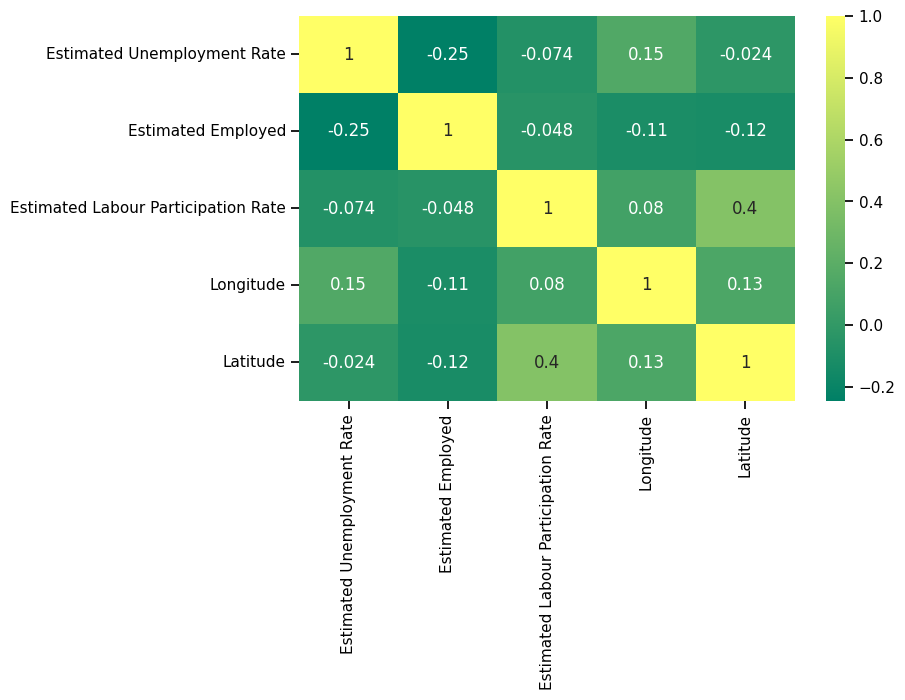

In [27]:
heat_maps = data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Longitude', 'Latitude']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(8, 5))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')

In [28]:
# Box plot of Unemployment Rate by State

fig = px.box(data, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [35]:
# scatter matrix
fig = px.scatter_matrix(data, template='plotly',
                        dimensions=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'],
                        color='Region')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [37]:
# Bar plot of average Unemployment Rate by State

plot_ump = data[['Estimated Unemployment Rate', 'States']]
data_unemp = plot_ump.groupby('States').mean().reset_index()
data_unemp = data_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(data_unemp, x='States', y='Estimated Unemployment Rate', color='States',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [38]:
# Sunburst chart showing unemployment rate in each region and state

unemplo_data = data[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
unemplo = unemplo_data.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()